In [2]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [22]:
timeframe = "1Day"

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [24]:
tickers = ["SPY","AGG"]

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [26]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

In [27]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

In [29]:
# Display sample data
df_ticker.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [30]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [33]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 170.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 180.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 190.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 220.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 230.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 240.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 310.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 320.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 350.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 440.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 450.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 460.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 470.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-In

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000196,0.993131,0.993683,1.004982,1.002687,1.001260,0.995626,0.994138,1.007714,0.991707,...,0.996867,1.003464,0.995044,0.998764,0.991594,1.011672,0.996015,1.006316,0.994737,0.997889
2,0.989616,0.986931,1.004111,0.994711,0.995214,1.013271,0.999484,0.992771,0.996046,0.990027,...,1.011069,1.013017,0.994155,1.001127,0.980214,1.009156,0.991001,1.003046,0.986930,0.995558
3,0.996652,0.992811,1.008884,0.999064,0.978749,1.010742,1.003971,0.996525,0.992659,0.986199,...,1.032738,1.000666,1.002779,1.000971,0.969928,1.008920,0.985849,1.012547,0.970884,0.992696
4,0.996406,0.995767,1.005941,1.004442,0.986974,1.005758,1.002030,0.996987,0.993210,0.997663,...,1.040183,0.994492,1.012072,1.007303,0.959806,1.026783,0.978524,1.024200,0.973264,1.002381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.718731,1.640674,1.517790,1.496173,1.427478,2.104375,1.809866,2.283336,1.616798,1.483602,...,1.306499,1.581690,1.901723,2.288283,1.366691,1.460573,1.166692,1.887962,1.064975,1.103338
1257,1.713879,1.653967,1.521571,1.474036,1.424341,2.108283,1.821571,2.304851,1.632088,1.471214,...,1.318167,1.593721,1.890879,2.286595,1.373342,1.465140,1.168920,1.892138,1.067565,1.103767
1258,1.695508,1.655589,1.518565,1.483076,1.421572,2.117745,1.828739,2.308187,1.620588,1.477840,...,1.333363,1.599164,1.902969,2.293300,1.376729,1.446132,1.179487,1.896539,1.069812,1.086551
1259,1.679936,1.658982,1.527574,1.460114,1.427807,2.113343,1.824991,2.313804,1.623690,1.489455,...,1.327108,1.603011,1.904340,2.293883,1.373727,1.456813,1.189173,1.884259,1.072474,1.089648


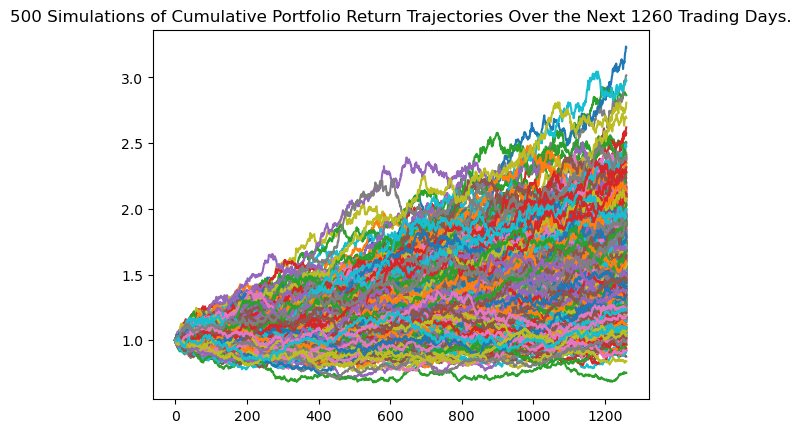

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

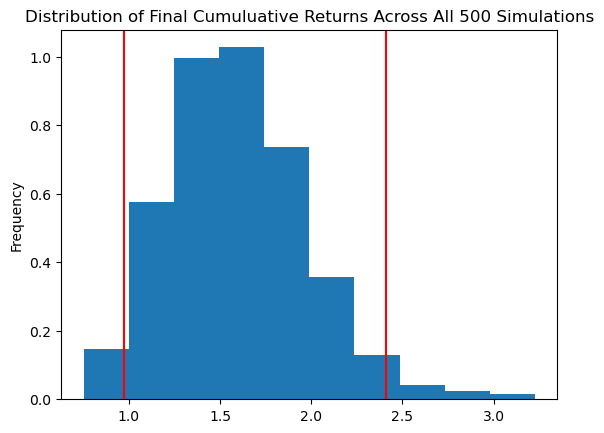

In [37]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()
print(tbl)

count           500.000000
mean              1.598553
std               0.382355
min               0.753099
25%               1.323501
50%               1.550717
75%               1.843717
max               3.225924
95% CI Lower      0.973073
95% CI Upper      2.409633
Name: 1260, dtype: float64


/Users/amirel-hilon/Documents/05-APIs 2/3/Activities/03-Ins_Portfolio_Forecasting_Monte_Carlo/Solved/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [40]:
# Set initial investment
initial_investment = 20000

In [41]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

In [42]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $9730.73 and $24096.33


In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

In [45]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $9730.73 and $24096.33
